<div style="text-align: center;">
  <img src="images/Depressed_Student.png" alt="Depressed Student Illustration" width="600"/>
</div>

## Hello! 
This is a project to predict **Student Depression** using the [Student Depression Dataset](https://www.kaggle.com/datasets/hopesb/student-depression-dataset/data) from Kaggle. Understanding and predicting depression among students is an essential task, as mental health plays a critical role in their academic performance and overall well-being.  

Student depression datasets are typically used to analyze and predict depression levels among students. This project can contribute to identifying factors influencing student mental health and designing early intervention strategies.

The dataset provides comprehensive information about students and their mental health status, with 18 columns and 27,901 rows, structured in a CSV format. Below is a brief explanation of the columns:  

1. **id**: A unique identifier for each student.  
2. **Gender**: The gender of the student.  
3. **Age**: The age of the student.  
4. **City**: The city where the student resides.  
5. **Profession**: The student's occupation, such as student, part-time worker, etc.  
6. **Academic Pressure**: The level of academic stress experienced by the student.  
7. **Work Pressure**: The work-related stress experienced by the student.  
8. **CGPA**: The student’s cumulative grade point average.  
9. **Study Satisfaction**: The student’s level of satisfaction with their studies.  
10. **Job Satisfaction**: The student’s level of satisfaction with their job or part-time work.  
11. **Sleep Duration**: Average sleep duration in hours per day.  
12. **Dietary Habits**: The dietary pattern of the student (e.g., healthy or unhealthy).  
13. **Degree**: The current level of education the student is pursuing.  
14. **Have you ever had suicidal thoughts?**: A binary column (Yes/No) indicating if the student has had suicidal thoughts.  
15. **Work/Study Hours**: The number of hours spent working or studying per day.  
16. **Financial Stress**: The financial burden or stress experienced by the student.  
17. **Family History of Mental Illness**: A binary column (Yes/No) indicating if the student has a family history of mental health issues.  
18. **Depression**: The target variable, indicating whether the student is experiencing depression (Yes/No).  

> ⚠️ *Disclaimer*: This dataset, given its sensitive nature, must be used responsibly, ensuring ethical considerations like privacy, informed consent, and data anonymization. This project aims to leverage this dataset to build a model capable of predicting depression status in students and identifying significant contributing factors.

# **Step 2: Exploratory Data Analysis (EDA) – Data Visualization**

This notebook focuses on the **visual exploration and analysis** of the Student Depression Prediction dataset. The goal is to understand data distributions, relationships, and patterns using various graphical techniques to inform further analysis and modeling.

---

### Objectives of This Notebook

1. [Univariate Analysis: Distribution of Single Variables](#univariate-analysis)  
2. [Bivariate Analysis: Exploring Relationships Between Two Variables](#bivariate-analysis)  
3. [Data Encoding: Converting Categorical Variables](#data-encoding)  
4. [Multivariate Analysis: Examining Interactions Among Multiple Variables](#multivariate-analysis)  
5. [Summary and Key Insights](#summary)

---

### Next Steps

- Step 3: [EDA – SQL Queries](./03_eda_sql_queries.ipynb)  
- Step 4: [Excel Dashboard](./04_excel_dashboard.xlsx)  
- Step 5: [Modeling & Prediction](./05_modeling_prediction.ipynb)

## **2.1 Import Libraries and Load the Dataset**

We start by importing the necessary Python libraries and loading the dataset into a DataFrame.

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd

# NumPy is a Python library that supports fast operations on large, multi-dimensional arrays and provides a wide range of mathematical functions.
import numpy as np

# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt

# Seaborn is a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# Import display function to render DataFrames or outputs neatly in the notebook
from IPython.display import display

In [2]:
# Load the dataset
print("Previewing the raw dataset:")
df = pd.read_csv("student_depression_cleaned.csv")
display(df.head())

Previewing the raw dataset:


,id,gender,age,region,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work/study_hours,financial_stress,family_mental_history,depression
0,2,Male,33.0,South,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,Undergraduate,Yes,3.0,1.0,No,1
1,8,Female,24.0,South,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,Undergraduate,No,3.0,2.0,Yes,0
2,26,Male,31.0,North,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,Undergraduate,No,9.0,1.0,Yes,0
3,30,Female,28.0,North,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,Undergraduate,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,North,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,Postgraduate,Yes,1.0,1.0,No,0


---

<a id="inspection"></a>

## **2.2 Initial Inspection**

We inspect the structure, data types, and basic info of the dataset.

In [3]:
# Display basic structure of the dataset
print("Dataset Info:")
display(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27814 entries, 0 to 27813
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     27814 non-null  int64  
 1   gender                 27814 non-null  object 
 2   age                    27814 non-null  float64
 3   region                 27814 non-null  object 
 4   profession             27814 non-null  object 
 5   academic_pressure      27814 non-null  float64
 6   work_pressure          27814 non-null  float64
 7   cgpa                   27814 non-null  float64
 8   study_satisfaction     27814 non-null  float64
 9   job_satisfaction       27814 non-null  float64
 10  sleep_duration         27814 non-null  object 
 11  dietary_habits         27814 non-null  object 
 12  degree                 27814 non-null  object 
 13  suicidal_thoughts      27814 non-null  object 
 14  work/study_hours       27814 non-null  f

None

In [4]:
# Summary statistics for numerical columns
print("Numerical Summary:")
display(df.describe())

Numerical Summary:


,id,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,work/study_hours,financial_stress,depression
count,27814.000000,27814.000000,27814.000000,27814.000000,27814.000000,27814.000000,27814.000000,27814.000000,27814.000000,27814.000000
mean,70457.226612,25.820234,3.141655,0.000431,7.656051,2.943985,0.000683,7.160099,3.140001,0.585461
std,40649.122278,4.906662,1.381833,0.044061,1.470757,1.360949,0.044464,3.706602,1.436973,0.492651
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35047.750000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70722.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105829.500000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [5]:
# Summary statistics for categorical columns
print("Categorical Summary:")
display(df.describe(include=[object]))

Categorical Summary:


,gender,region,profession,sleep_duration,dietary_habits,degree,suicidal_thoughts,family_mental_history
count,27814,27814,27814,27814,27814,27814,27814,27814
unique,2,4,2,4,3,4,2,2
top,Male,West,Student,Less than 5 hours,Unhealthy,Undergraduate,Yes,No
freq,15498,11955,27783,8288,10280,12612,17601,14347


In [6]:
# Checking the shape of the dataset (rows, columns)
print(f"The dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns.")

The dataset contains 27,814 rows and 18 columns.


In [7]:
# Getting the column for the dataframe
print(f"The dataset columns include:")
display(df.columns)

The dataset columns include:


Index(['id', 'gender', 'age', 'region', 'profession', 'academic_pressure',
       'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction',
       'sleep_duration', 'dietary_habits', 'degree', 'suicidal_thoughts',
       'work/study_hours', 'financial_stress', 'family_mental_history',
       'depression'],
      dtype='object')

---

<a id="univariate-analysis"></a>

## **2.3 Univariate Analysis: Distribution of Single Variables**

We explore the distribution and frequency of individual variables to understand their characteristics and spot potential data quality issues.

In [8]:
# Grouping the Columns
columns_1 = ['profession', 'academic_pressure', 'work_pressure']
columns_2 = ['study_satisfaction', 'job_satisfaction', 'sleep_duration']
columns_3 = ['suicidal_thoughts', 'dietary_habits', 'degree']
columns_4 = ['work/study_hours', 'financial_stress', 'family_mental_history']

In [9]:
# Create count plots for a list of categorical columns.
def plot_categorical_counts(columns):
    
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(6 * len(columns), 6))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if i < len(axes):
            sns.countplot(x=column, data=df, ax=axes[i])
            axes[i].set_title(f'Count Plot of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
            axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    plt.tight_layout()
    plt.show()

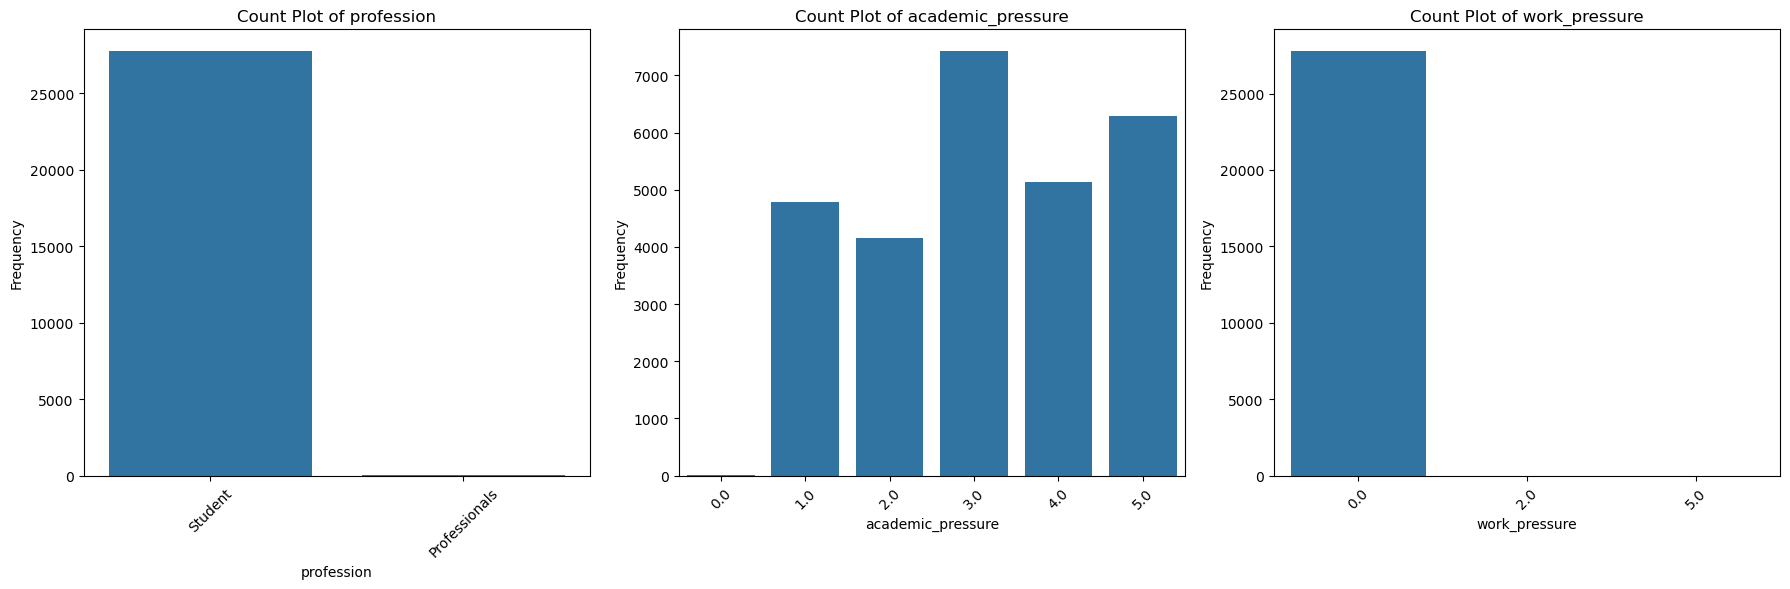

In [10]:
plot_categorical_counts(columns_1)

#### Summary of the Count Plots:

1. **Profession**:
The majority of respondents are students, with only a small proportion being professionals.

2. **Academic Pressure**:
Academic pressure is highest at a level of 3, with levels 4 and 5 also showing significant frequencies.

3. **Work Pressure**:
Most respondents reported no work pressure, with very few experiencing higher levels of work pressure.

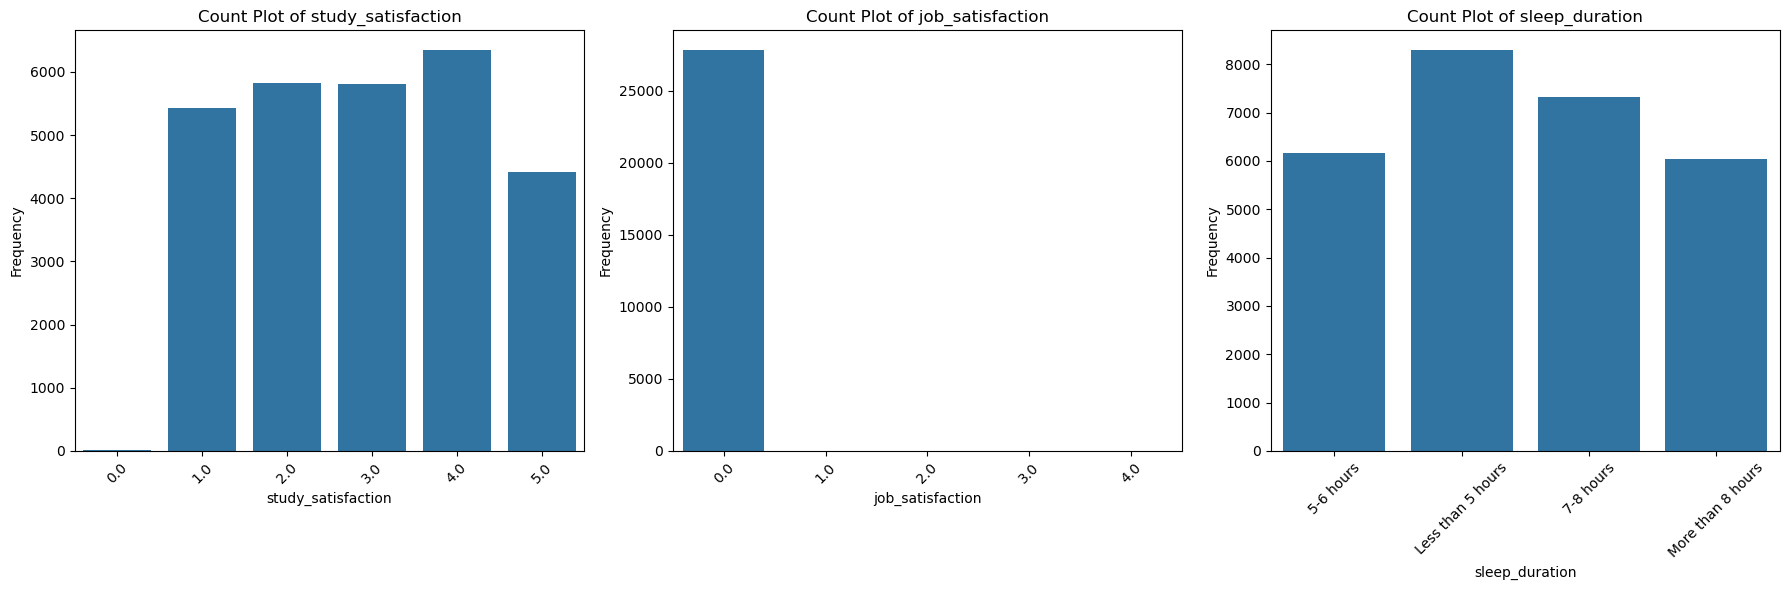

In [11]:
plot_categorical_counts(columns_2)

#### Summary of the Count Plots:

1. **Study Satisfaction**:
Study satisfaction levels are fairly balanced, with level 4 being the most frequent and level 5 being the least.

2. **Job Satisfaction**:
Most respondents reported zero job satisfaction, indicating that many may not be employed or do not find satisfaction in their jobs.

3. **Sleep Duration**:
The most common sleep duration is "Less than 5 hours," followed by "7–8 hours". 
"More than 8 hours" and "5–6 hours" have relatively lower frequencies.

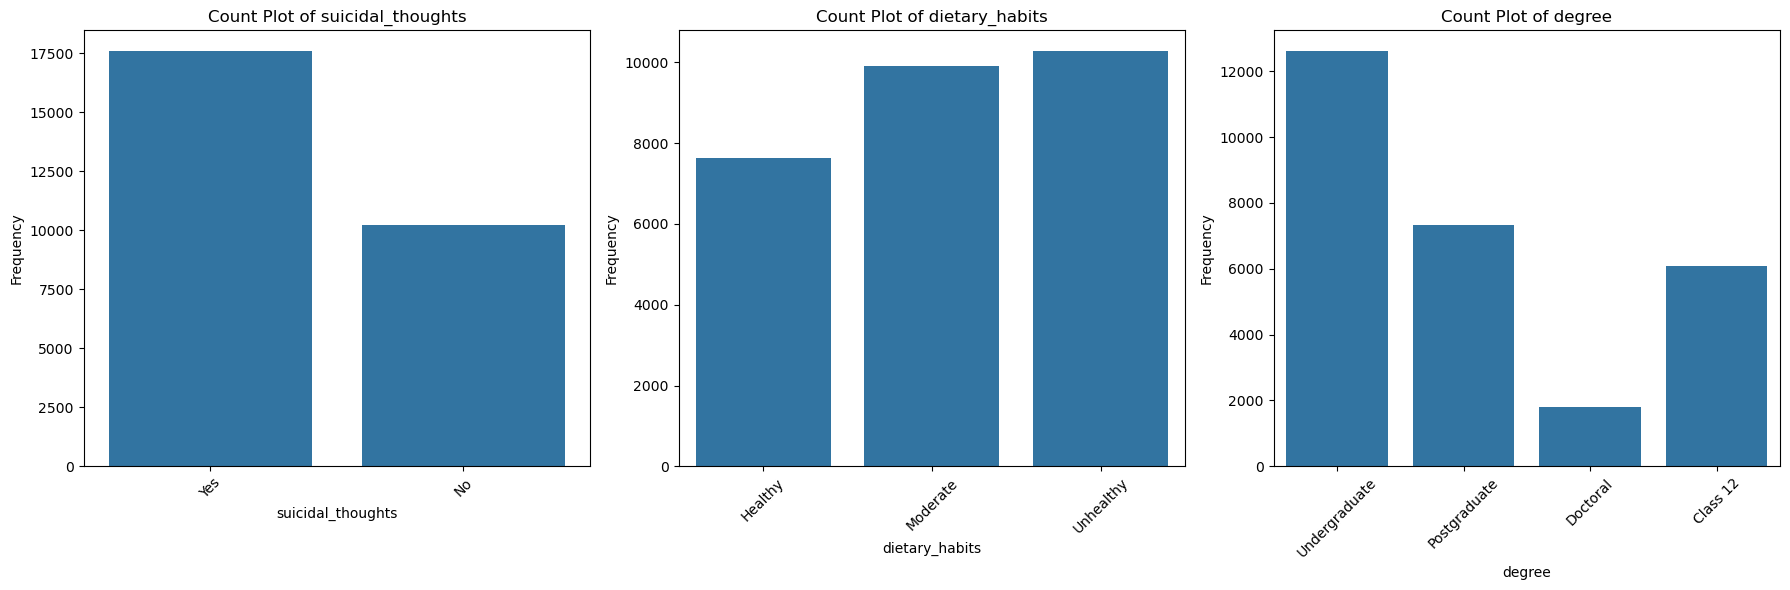

In [12]:
plot_categorical_counts(columns_3)

#### Summary of the Count Plots:

1. **Suicidal Thoughts**:
The majority of individuals reported having suicidal thoughts, with "Yes" responses outnumbering "No" responses significantly.

2. **Dietary Habits**:
The distribution of dietary habits is balanced across "Healthy," "Moderate," and "Unhealthy" categories, with no significant variation.

3. **Degree**:
Undergraduate degrees are the most frequent, followed by postgraduate degrees.
Class 12 and doctoral degrees are less represented.

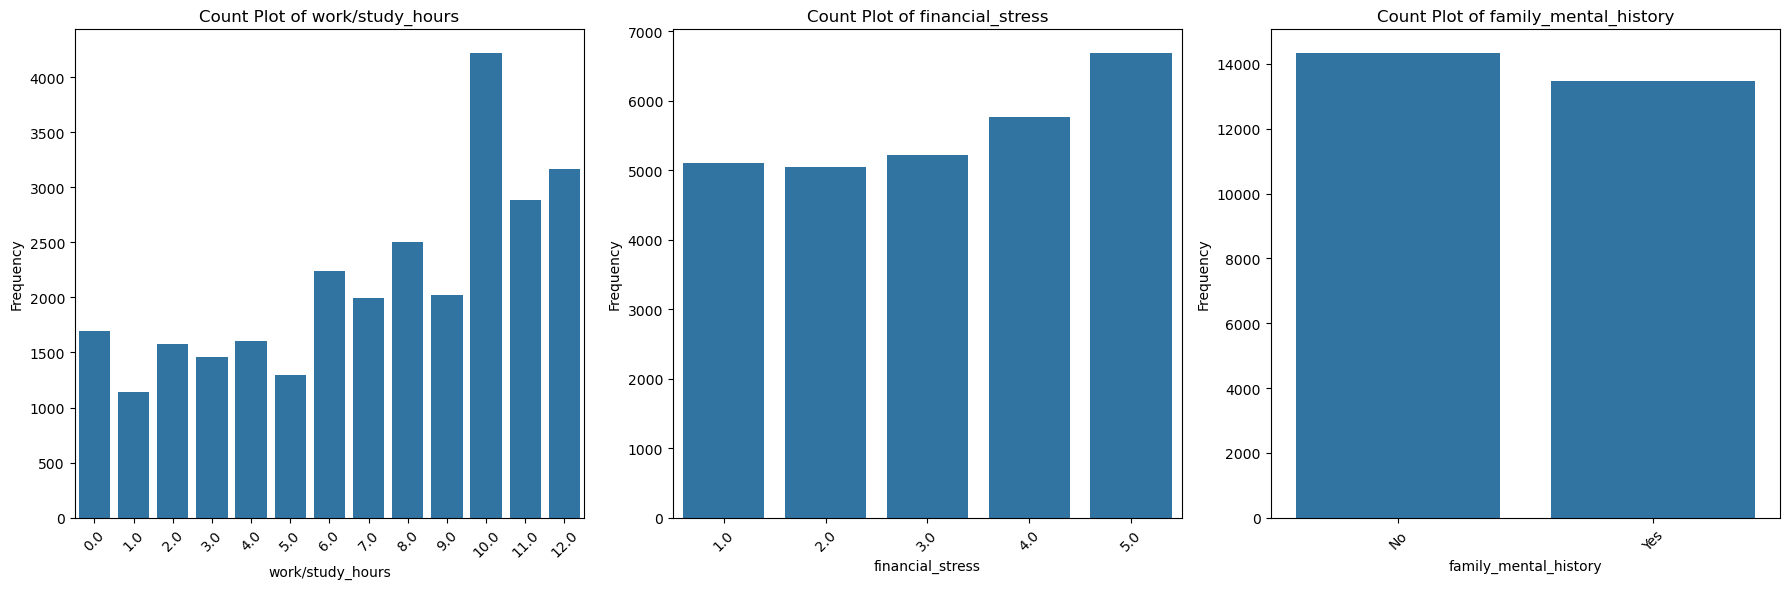

In [13]:
plot_categorical_counts(columns_4)

#### Summary of the Count Plots:

1. **Family Mental Illness History**:
A nearly equal distribution is observed between respondents with and without a family history of mental illness.

2. **Financial Stress**:
Financial stress levels are distributed fairly evenly across all levels, with the highest frequency observed at the maximum stress level (5).

3. **Work/Study Hours**:
The distribution of work/study hours shows variability, with the highest frequency at 10 hours, followed by a decline as hours increase.

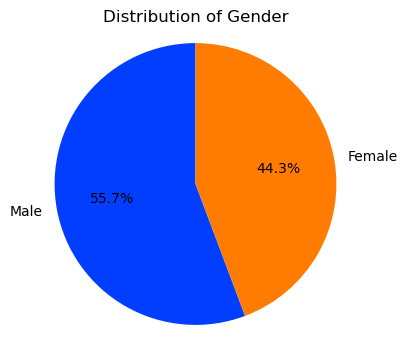

In [14]:
# Count gender categories
gender_counts = df['gender'].value_counts()

# Plot gender distribution as a pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    gender_counts.values,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('bright', len(gender_counts))
)
plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()

#### Summary of the Pie Chart:

The gender distribution shows that 55.7% of the respondents are male, while 44.3% are female, indicating a slight majority of male participants in the dataset.

In [15]:
# Plot both a boxplot and a histogram (with KDE) for a numerical column.
def plot_numerical_distribution(column, color='blue'):

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Boxplot
    sns.boxplot(data=df, x=column, ax=axes[0], color=color)
    axes[0].set_title(f'Boxplot of {column}')

    # Histogram with KDE
    sns.histplot(data=df, x=column, bins=20, kde=True, color=color, ax=axes[1])
    axes[1].set_title(f'Histogram of {column}')

    # Adjust spacing between plots
    plt.tight_layout()
    plt.show()

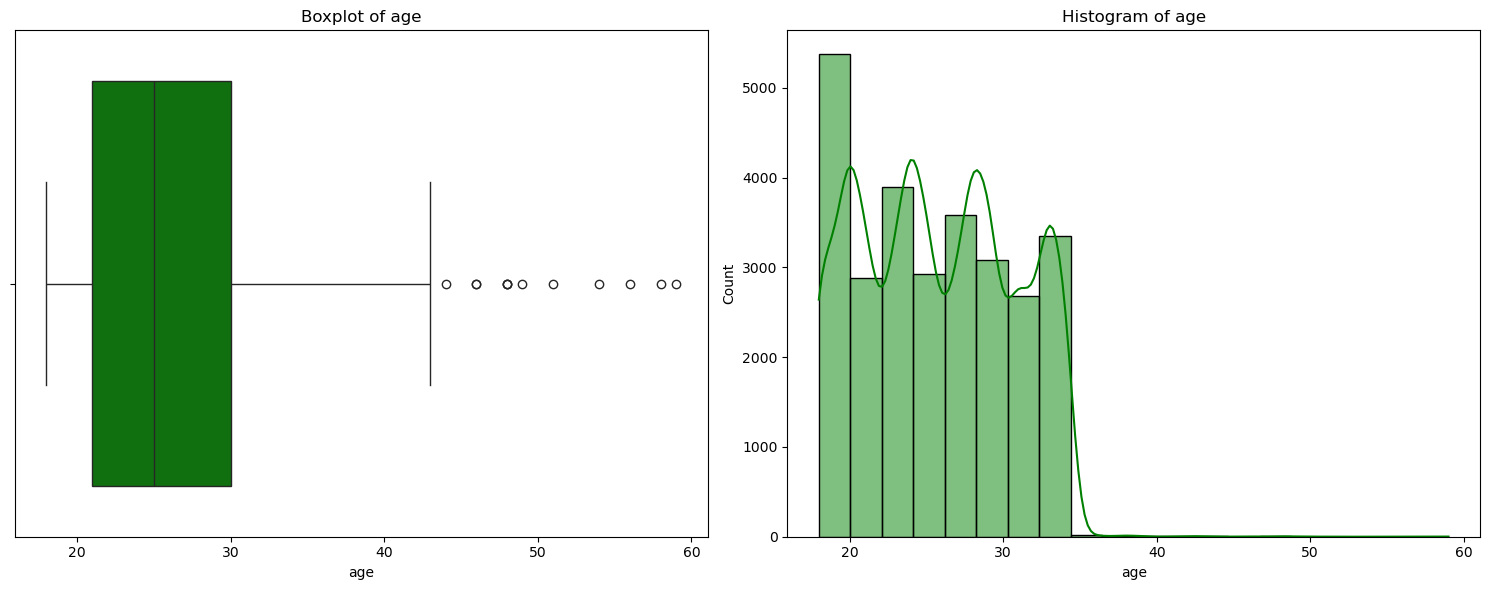

In [16]:
plot_numerical_distribution(column='age', color='green')

#### Summary of the plots:

The majority of CGPA values are distributed between 6 and 8, indicating consistent academic performance for most students. A single outlier near CGPA 0 indicates an unusually low score compared to the rest. The boxplot suggests a symmetrical distribution with no strong skew. The histogram shows a unimodal distribution with a clear peak, suggesting that most students cluster around similar CGPA levels.

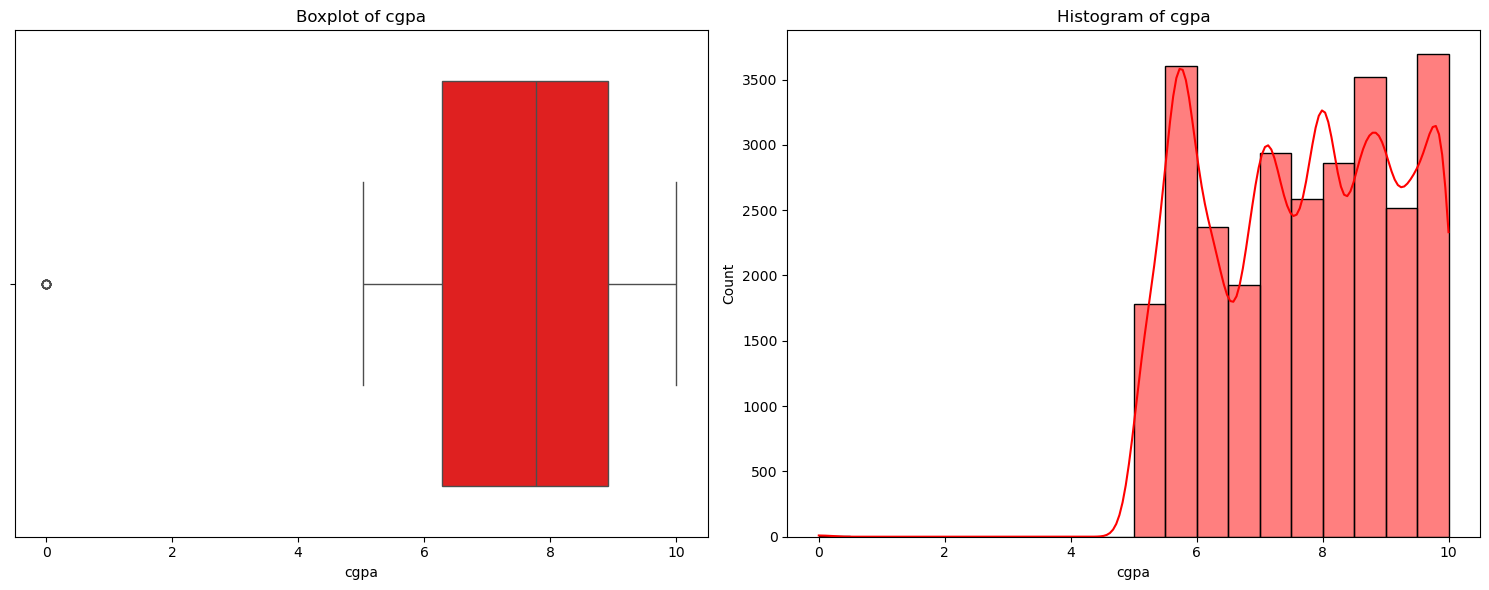

In [17]:
plot_numerical_distribution(column='cgpa', color='red')

#### Summary of the plots:

Most individuals fall within the 20 to 30-year age range, indicating a young adult population. Outliers are present beyond 40 years, extending up to around 60. The boxplot highlights a right-skewed distribution with several outliers, suggesting that while most participants are younger, some older individuals are present. The histogram shows a multimodal trend within the younger age group, indicating clusters of ages in the early 20s and late 20s.

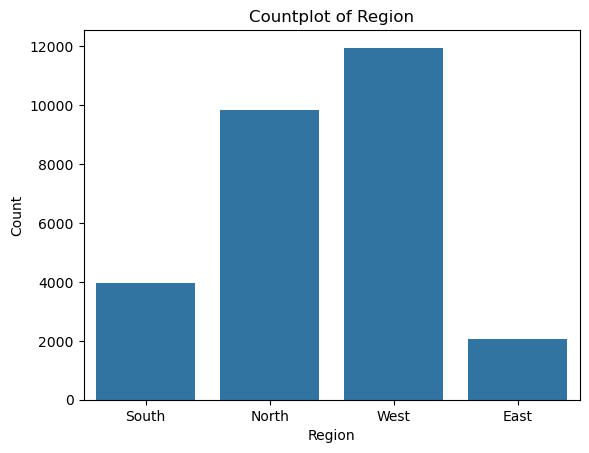

In [18]:
# Plot the distribution of the feature variable: Region
sns.countplot(x='region', data=df)
plt.title('Countplot of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

#### Summary of the Count plot:

The "West" region has the highest count of individuals. The "North" region follows as the second most represented group. The "South" and "East" regions have significantly fewer individuals, with the "East" having the least count.

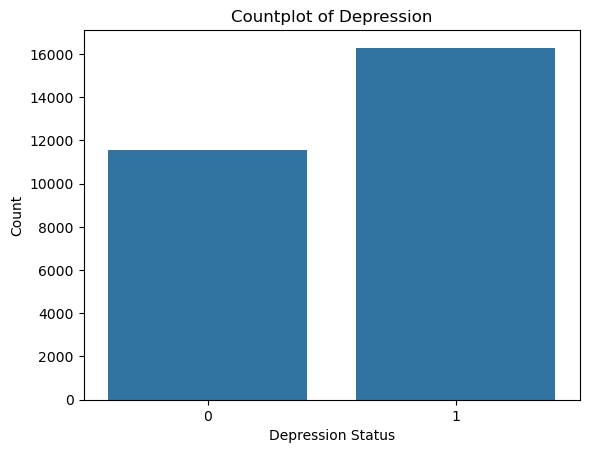

In [19]:
# Plot the distribution of the target variable: Depression
sns.countplot(x='depression', data=df)
plt.title('Countplot of Depression')
plt.xlabel('Depression Status')
plt.ylabel('Count')
plt.show()

#### Summary of the Count Plot on the Target:

The count chart represents the count of individuals based on the presence (1) or absence (0) of depression. A higher number of individuals (around 16,000) experience depression (1) compared to those who do not (around 13,000).

---

<a id="bivariate-analysis"></a>

## **2.4 Bivariate Analysis: Exploring Relationships Between Two Variables**

We analyze the relationships between pairs of variables, helping us identify correlations and potential predictors.

In [20]:
# Count Plot for each of the Categorical variables and checking the relationship with the Target
def plot_categorical_with_depression(columns):

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

    for i, column in enumerate(columns):
        if i < len(axes):
            sns.countplot(x=column, hue='depression', data=df, ax=axes[i])
            axes[i].set_title(f"Count Plot of {column.replace('_', ' ').title()} by Depression")
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
            axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

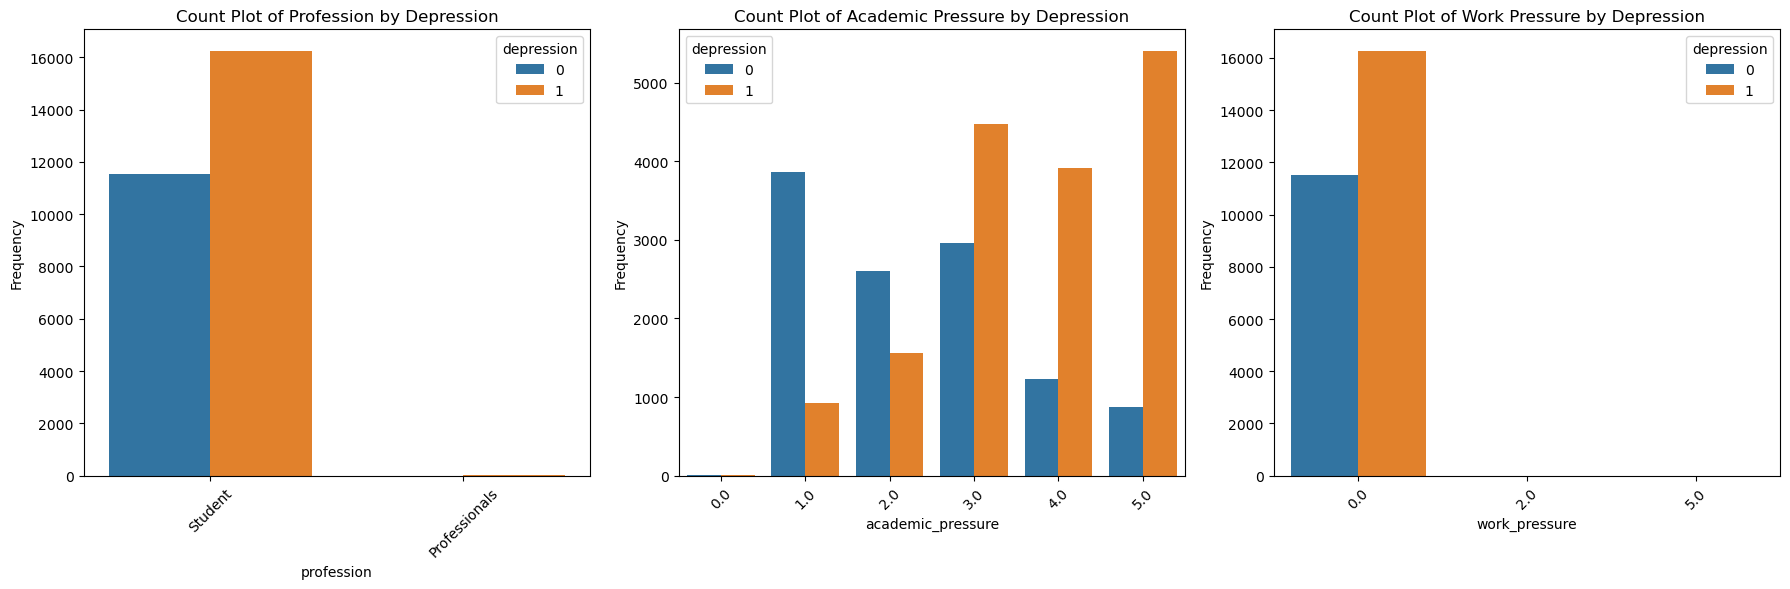

In [21]:
plot_categorical_with_depression(columns_1)

#### Summary of relationship between each Count Plot and Depression:

1. **Profession by Depression**:
Students are significantly more likely to experience depression compared to professionals. There are very few professionals in the dataset overall, with minimal representation in both the depressed (1) and non-depressed (0) categories.

2. **Academic Pressure by Depression**:
Higher levels of academic pressure (values 3, 4, and 5) are associated with a greater frequency of depression (1). At lower academic pressure levels (0, 1, and 2), more individuals do not experience depression (0).

3. **Work Pressure by Depression**:
Most individuals experiencing depression (1) report no work pressure (value 0). There is minimal representation of work pressure levels beyond 0, suggesting that work pressure may not significantly contribute to depression in this dataset.

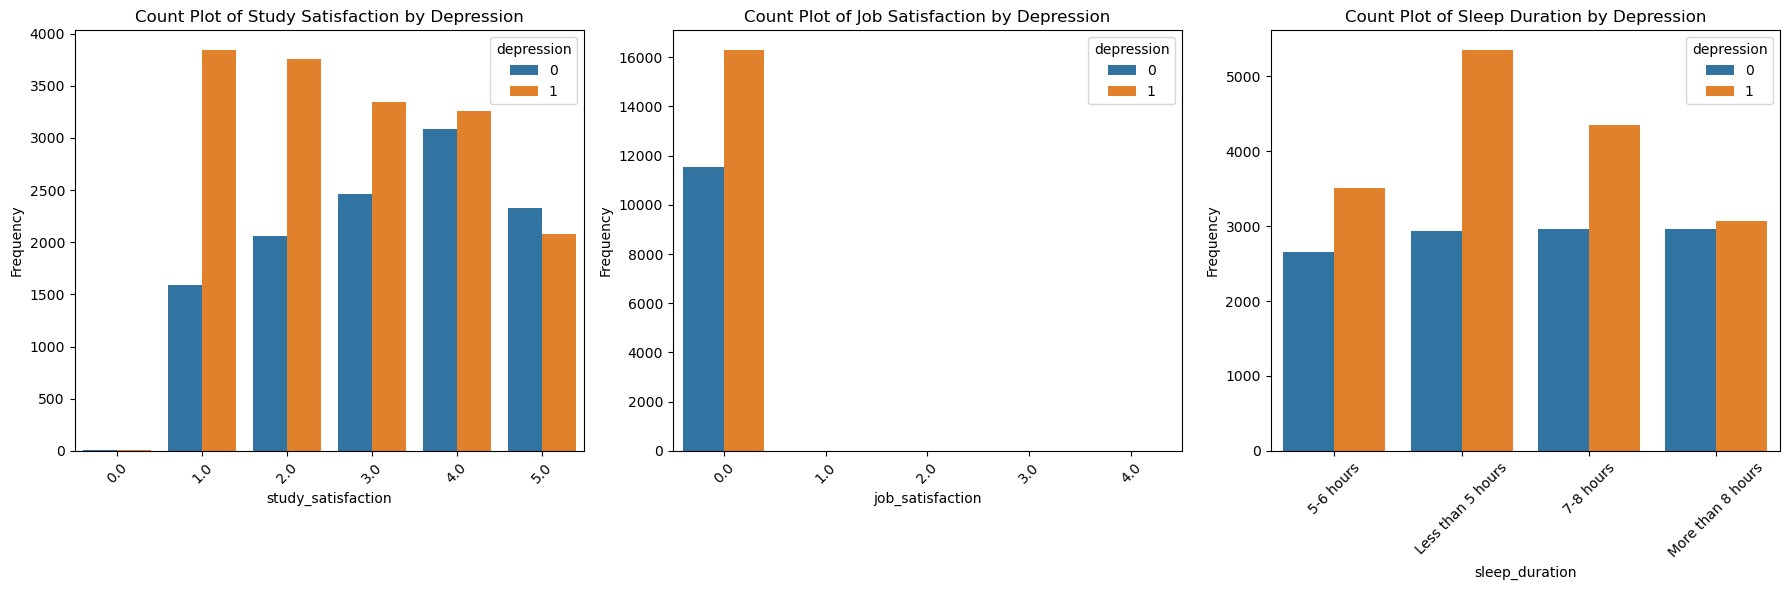

In [22]:
plot_categorical_with_depression(columns_2)

#### Summary of relationship between each Count Plot and Depression:

1. **Study Satisfaction by Depression**:
Individuals with depression (orange bars) generally outnumber those without depression (blue bars) across all levels of study satisfaction. The trend suggests that depression exists irrespective of study satisfaction levels but may slightly increase in lower satisfaction categories.

2. **Job Satisfaction by Depression**:
Depression (orange bars) is predominant even at varying levels of job satisfaction. The majority of individuals with low job satisfaction appear to report depression.

3. **Sleep Duration by Depression**:
Individuals reporting less than 5 hours of sleep show a significantly higher prevalence of depression (orange bars) compared to those without depression (blue bars). Depression seems to decrease with increased sleep duration, but a slight increase is observed for those sleeping more than 8 hours.

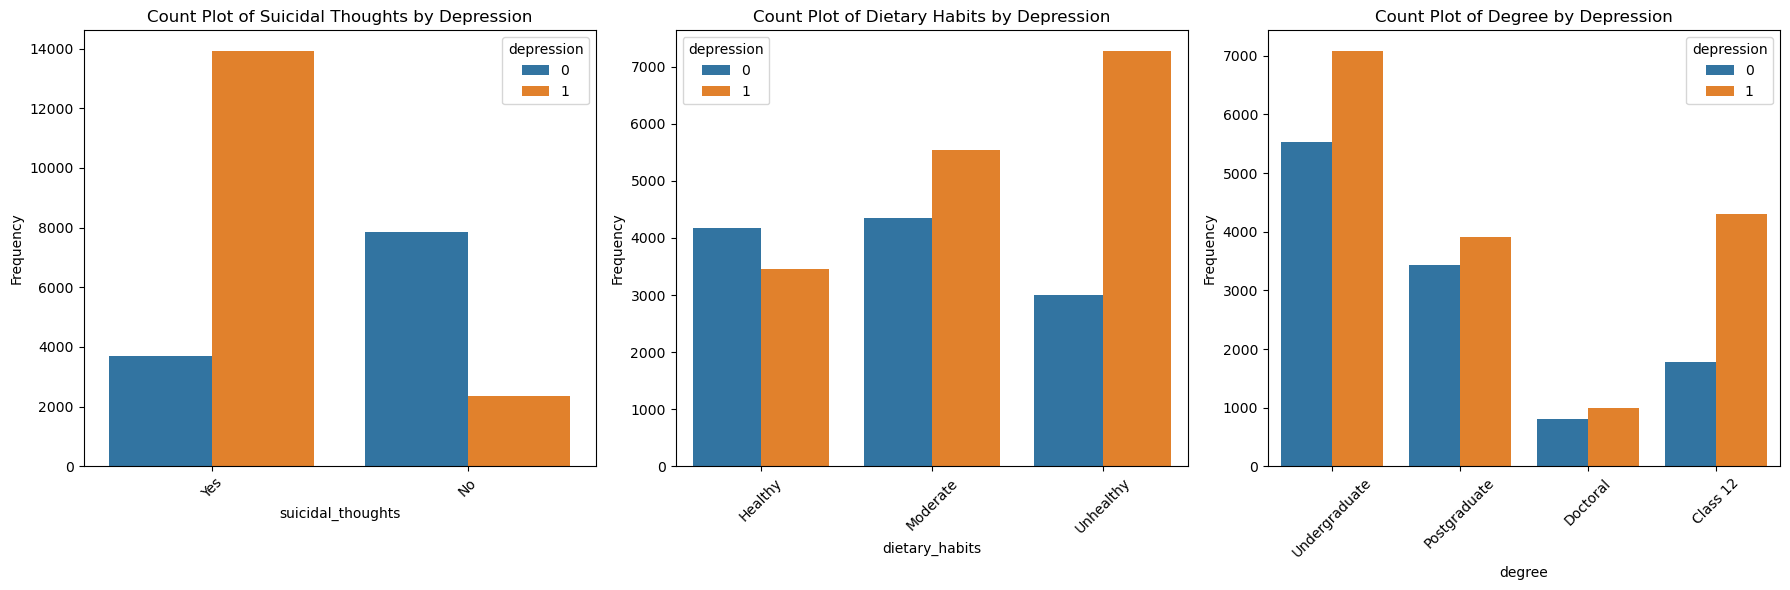

In [23]:
plot_categorical_with_depression(columns_3)

#### Summary of relationship between each Count Plot and Depression:

1. **Suicidal Thoughts by Depression**:
A strong association exists between suicidal thoughts and depression, with a significantly higher number of individuals with depression reporting suicidal thoughts (orange bar for "Yes").
Those without depression are more likely to report no suicidal thoughts.

2. **Dietary Habits by Depression**:
Unhealthy dietary habits are strongly associated with depression, as indicated by the higher orange bars. Those with healthy or moderate dietary habits are less likely to report depression, though there are still notable cases.

3. **Degree by Depression**:
Depression is more prevalent among undergraduates, followed by individuals in Class 12 (high school level). Postgraduates show a balanced distribution between those with and without depression, while doctoral-level individuals have the lowest cases overall.

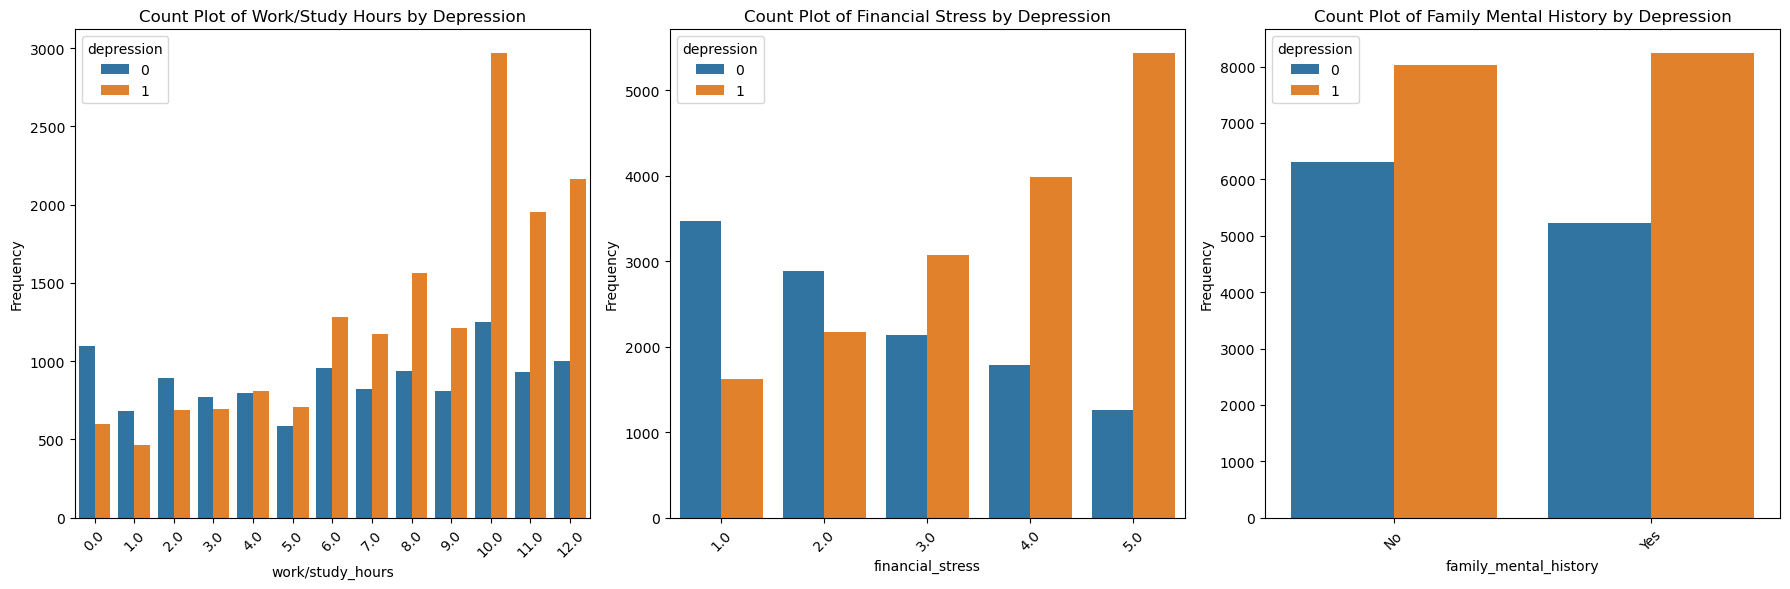

In [24]:
plot_categorical_with_depression(columns_4)

#### Summary of relationship between each Count Plot and Depression:

1. **Family Mental History by Depression**:
A significant portion of those with depression (orange bars) also report a family history of mental illness. This suggests a possible correlation between family mental health history and individual depression.

2. **Financial Stress by Depression**:
Financial stress is positively correlated with depression severity.
Individuals with higher financial stress levels (score 4 or 5) show significantly higher depression cases, whereas those with lower stress levels (score 1 or 2) have fewer cases.

3. **Work/Study Hours by Depression**:
Higher work or study hours (e.g., 10-12 hours) are associated with a sharp increase in depression cases.
Balanced or lower work hours (e.g., 5-7 hours) show a more even distribution between those with and without depression.

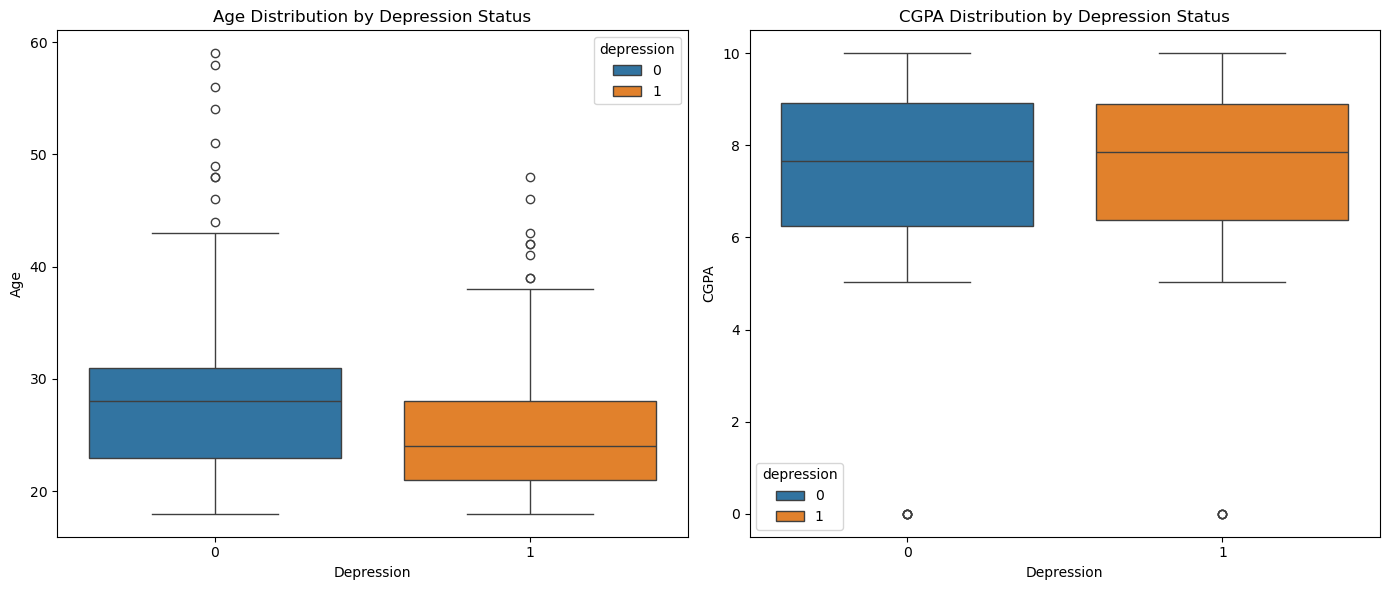

In [25]:
# Create side-by-side boxplots for Age and CGPA with Depression hue
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Age
sns.boxplot(x='depression', y='age', hue='depression', data=df, ax=axes[0])
axes[0].set_title('Age Distribution by Depression Status')
axes[0].set_xlabel('Depression')
axes[0].set_ylabel('Age')

# Boxplot for CGPA
sns.boxplot(x='depression', y='cgpa', hue='depression', data=df, ax=axes[1])
axes[1].set_title('CGPA Distribution by Depression Status')
axes[1].set_xlabel('Depression')
axes[1].set_ylabel('CGPA')

plt.tight_layout()
plt.show()

#### Summary of relationship between each Plot and Depression:

1. **Age by Depression**: 
The age distributions for individuals with and without depression are similar, with both groups predominantly in their 20s and a few outliers in older age ranges.

2. **CGPA by Depression**: 
The CGPA distributions for individuals with and without depression are nearly identical, with no apparent differences in central tendency or spread.

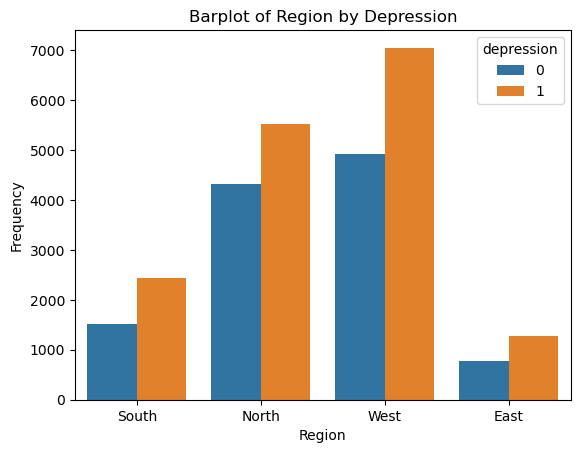

In [26]:
# Create a barplot of Region, grouped by Depression status
sns.countplot(x='region', data=df, hue='depression')
plt.title('Barplot of Region by Depression')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

#### Summary of relationship between the Region and Depression:
 
The majority of individuals with depression are concentrated in the North and West regions, with the South and East showing comparatively lower counts.

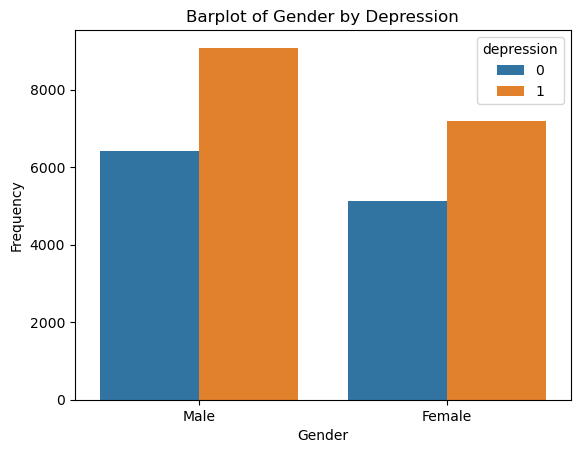

In [27]:
# Create a barplot of Region, grouped by Depression status
sns.countplot(x='gender', data=df, hue='depression')
plt.title('Barplot of Gender by Depression')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

#### Summary of relationship between the Count Plot for Gender and Depression:

A higher number of individuals with depression are male, but females with depression also outnumber their non-depressed counterparts.

---

<a id="data-encoding"></a>

## **2.5 Data Encoding**

In this section, we convert categorical variables into numerical formats where necessary. This is essential for some visualizations and later for machine learning models, which require numeric inputs.

In [28]:
# Converting categorical variables to numeric

# suicidal_thoughts: Map 'Yes' to 1, 'No' to 0
df['suicidal_thoughts'] = df['suicidal_thoughts'] \
    .map({'Yes': 1, 'No': 0}).astype(int)

# Family_Mental_History: Binary encoding — 1 for Yes, 0 for No
df['family_mental_history'] = df['family_mental_history'] \
    .map({'Yes': 1, 'No': 0}).astype(int)

# gender: 'Male' as 1, 'Female' as 0
df['gender'] = df['gender'] \
    .map({'Male': 1, 'Female': 0}).astype(int)

# profession: 'Student' as 1, 'Professionals' as 0
df['profession'] = df['profession'] \
    .map({'Student': 1, 'Professionals': 0}).astype(int)

# sleep_duration: Ordinal encoding
df['sleep_duration'] = df['sleep_duration'] \
    .map({'Less than 5 hours': 0, '7-8 hours': 1, '5-6 hours': 2, 'More than 8 hours': 3}).astype(int)

# dietary_habits: Ordinal encoding — 0 = Unhealthy, 2 = Healthy
df['dietary_habits'] = df['dietary_habits'] \
    .map({'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2}).astype(int)

# degree: Ordinal encoding of education level
df['degree'] = df['degree'] \
    .map({'Class 12': 0, 'Undergraduate': 1, 'Postgraduate': 2, 'Doctoral': 3}).astype(int)

In [29]:
# Applying One-Hot Encoding to the 'region' column and dropping the first category
region_dummies = pd.get_dummies(df['region'], prefix='region', drop_first=True)

# Concatenating the one-hot encoded columns to the original DataFrame
df = pd.concat([df.drop('region', axis=1), region_dummies], axis=1)

---

<a id="multivariate-analysis"></a>

## **2.6 Multivariate Analysis: Examining Interactions Among Multiple Variables**

We investigate complex interactions among three or more variables to gain deeper insights into the data structure.

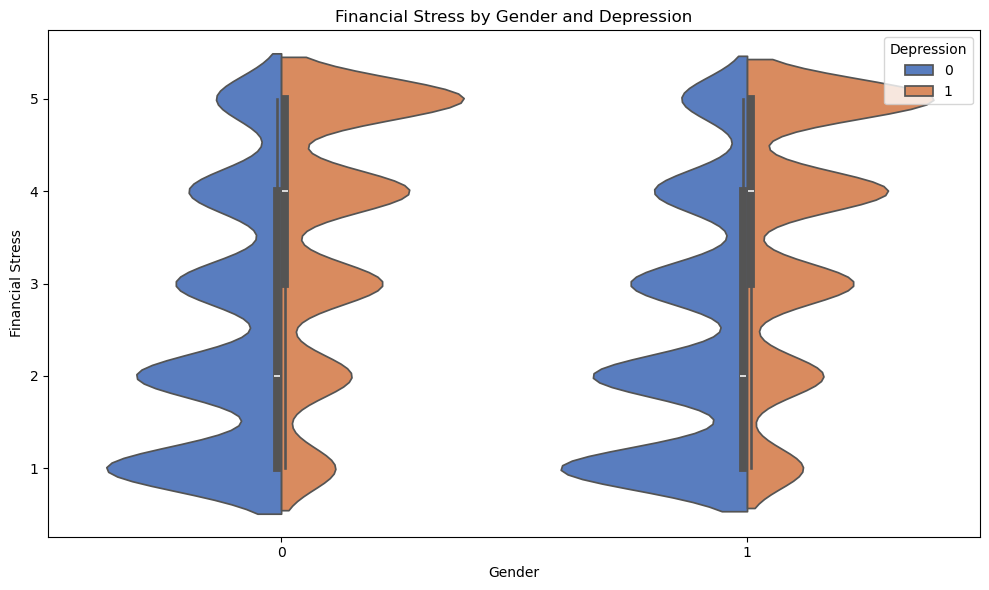

In [30]:
# Violin plot showing the distribution of Financial Stress by Gender, split by Depression status
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='gender', 
    y='financial_stress', 
    hue='depression', 
    data=df, 
    split=True, 
    palette='muted'
)
plt.title('Financial Stress by Gender and Depression')
plt.xlabel('Gender')
plt.ylabel('Financial Stress')
plt.legend(title='Depression')
plt.tight_layout()
plt.show()

#### From analysing the violin plot above, it can be observed that:
Financial stress levels show slight variations depending on depression status across different genders. Both genders exhibit similar overall distributions, although some subtle differences in density appear between individuals with and without depression. This suggests that while gender itself may not be a strong direct determinant of financial stress, depression status could influence stress experiences for both genders. Overall, the violin plot highlights possible interactions between financial stress, gender, and depression status.

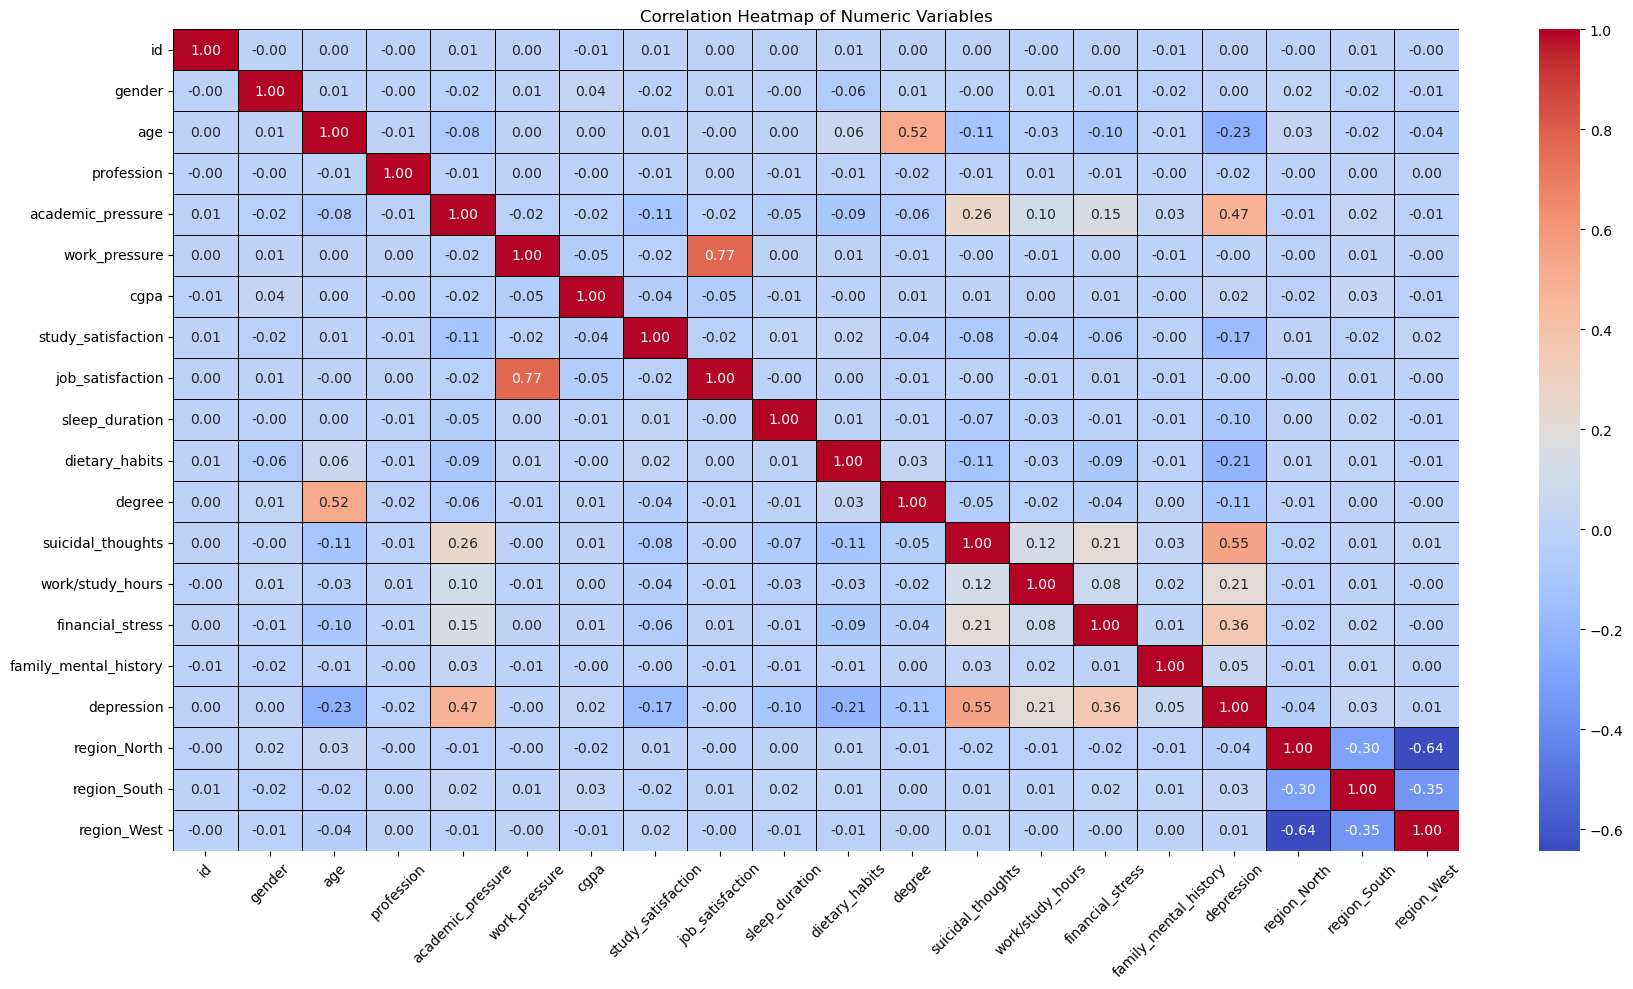

In [31]:
# Plotting a heatmap to check the correlation of the columns
plt.figure(figsize=(18, 10))

sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm',
    cbar=True,
    fmt='.2f',
    linewidths=0.5, 
    linecolor='black'
)

plt.title('Correlation Heatmap of Numeric Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

#### From analysing the Heatmap above, I can observe that:

1. Strong Correlation with Depression:
Suicidal Thoughts has the strongest positive correlation with Depression (54.69%), indicating that individuals experiencing suicidal thoughts are more likely to report higher levels of depression.
Financial Stress also has a notable positive correlation with Depression (36.34%), suggesting financial difficulties may play a significant role in depression levels.

2. Moderate/Weak Correlations:
Work/Study Hours shows a weak positive correlation (20.88%), hinting that excessive work/study hours might slightly contribute to depression levels.
Family Mental Illness History has a minor positive correlation (5.31%), suggesting a limited but existent influence of family mental health history on depression.

3. Negative Correlations:
Dietary Habits (-20.71%) and Sleep Duration (-9.88%) exhibit weak negative correlations, implying that better dietary habits and longer sleep durations are associated with lower levels of depression.

4. Other Observations:
Academic Pressure and Work Pressure have negligible correlations with Depression (-2.15% and -0.34%, respectively), indicating they might not be significant predictors in this dataset.
CGPA (-6.46%) and Study Satisfaction (-16.77%) also show weak negative correlations, suggesting that better academic performance and study satisfaction could be slightly linked to lower depression levels.

#### Key Insight:

"Suicidal Thoughts" and "Financial Stress" are the most critical variables associated with Depression in this dataset. 
Lifestyle factors like sleep and dietary habits also play a notable role. 
Academic and work-related pressures appear to have less impact on Depression levels based on the correlations in this dataset.

In [32]:
# Dropping irrelevant or low correlation columns that are not needed for modeling
data = df.drop(columns=[
    'id',
    'gender',
    'age',
    'profession',
    'work/study_hours',
    'family_mental_history',
    'sleep_duration',
    'cgpa',
    'work_pressure',
    'job_satisfaction',
    'region_West',
    'region_South',
    'region_North'
]).reset_index(drop=True)

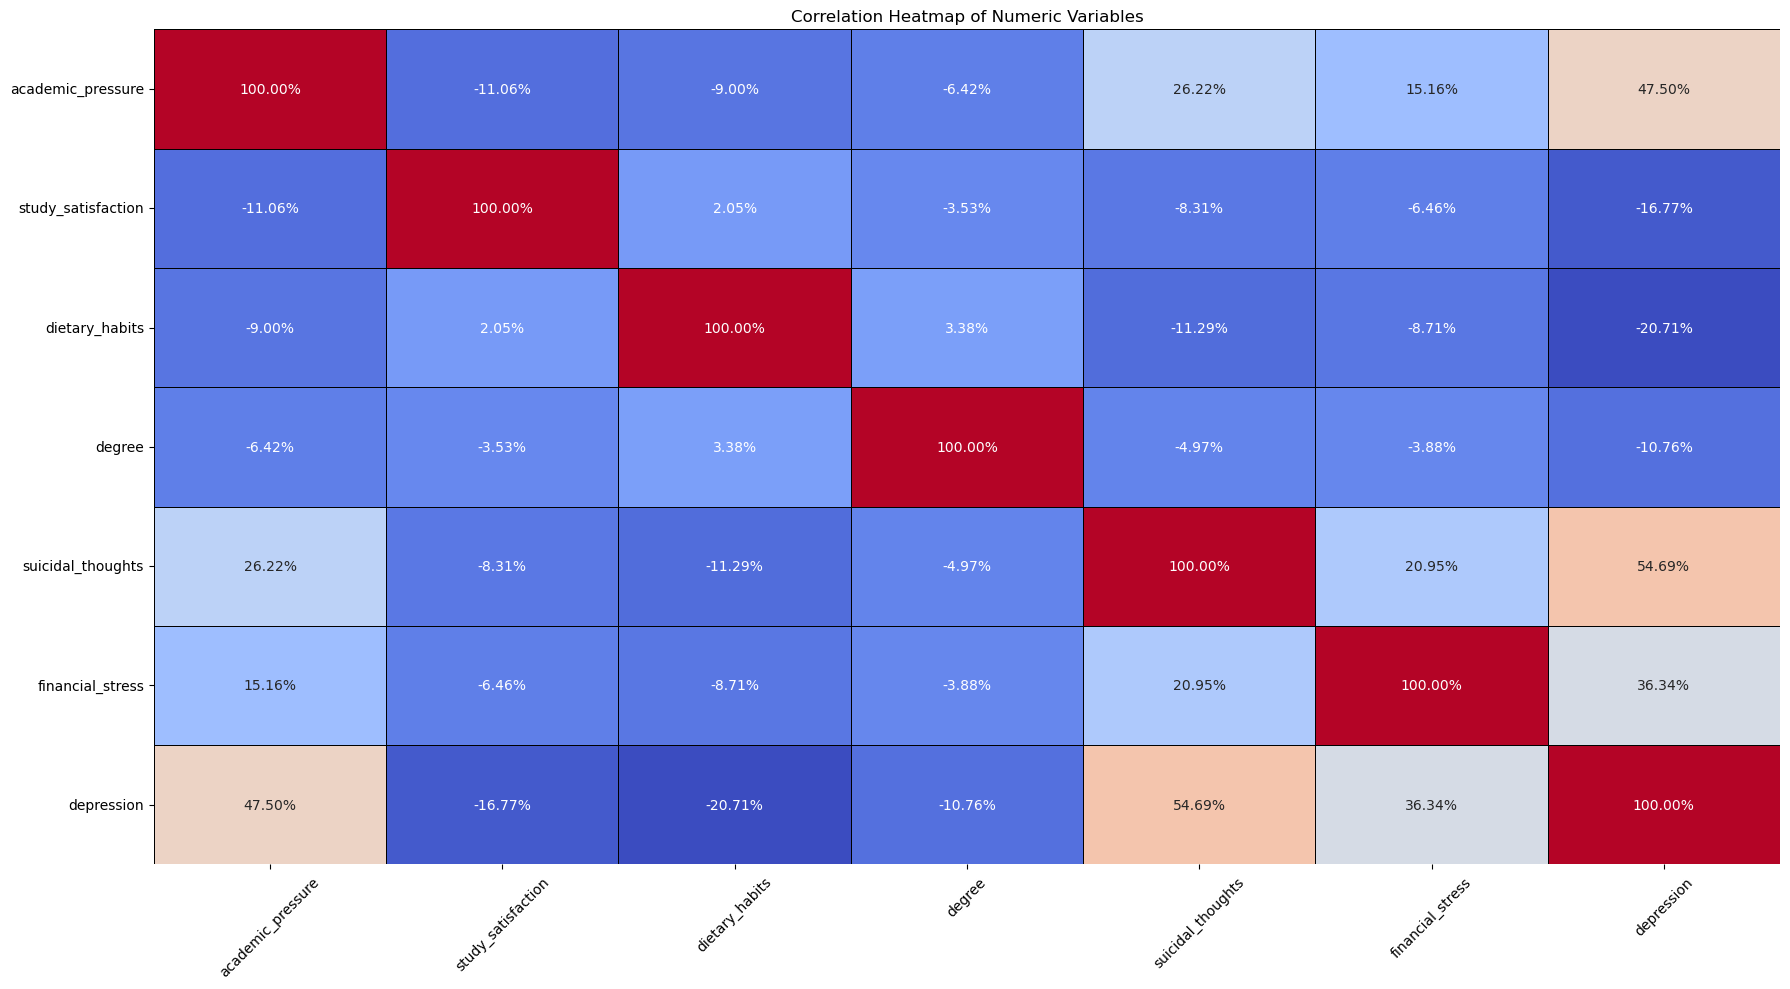

In [33]:
# Checking the dataset after removing unnecessary columns.
# These are the selected features that will be used for further analysis and modeling.
plt.figure(figsize=(18, 10))

sns.heatmap(
    data.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm',
    cbar=False,
    fmt='.2%',
    linewidths=0.5, 
    linecolor='black'
)

plt.title('Correlation Heatmap of Numeric Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

---

<a id="summary"></a>

## **2.7 Summary and Key Insights**

We summarize the key findings from the visual analysis to guide the next phases of the project.

#### Summary

- **Demographics and Gender:**

    The dataset has a slight male majority (55.7% male, 44.3% female). Most respondents are young adults, typically in their 20s, with a few older outliers.

- **Profession:**

    Most respondents are students, with very few professionals.

- **Academic and Work Pressures:**

    Academic pressure peaks at levels 3–5. Work pressure is mostly low or absent.

- **Satisfaction Measures:**

    Study satisfaction is fairly balanced, with level 4 being most common. Job satisfaction is predominantly reported as zero.

- **Sleep Patterns:**

    Most respondents report sleeping less than 5 hours, followed by 7–8 hours.

- **Mental Health:**

    A significant number of respondents report suicidal thoughts and financial stress. Family history of mental illness is evenly split.

- **Region:**

    Most respondents are from the West and North regions, with fewer from the South and East.

- **Depression:**

    Depression is reported more frequently (16,000) than no depression (13,000). Depression is higher among students, those with high academic pressure, unhealthy dietary habits, higher financial stress, suicidal thoughts, and longer work/study hours.

- **Correlation Insights:**

    Suicidal thoughts have the strongest positive correlation with depression (54.69%), followed by financial stress (36.34%). Sleep duration and dietary habits have weaker negative correlations, suggesting better sleep and healthier eating may lower depression risk.

#### Key Insights

- **Suicidal Thoughts and Financial Stress:**

    These are the strongest predictors of depression in the dataset. Individuals with suicidal thoughts or financial stress are much more likely to experience depression.

- **Lifestyle Factors:**

    Poor dietary habits and short sleep duration correlate with higher depression levels. Healthier eating and better sleep might help reduce depression risk.

- **Demographics:**

    Gender and regional distributions show a slight male majority and concentration in the West and North. These factors, however, have weaker associations with depression.

- **Academic and Work Factors:**

    Surprisingly, academic and work pressures show low correlation with depression, suggesting other factors (e.g., mental health history, lifestyle) may play a stronger role.

- **Family Mental Health:**

    Family history of mental illness shows a weak but positive association with depression, indicating a potential influence.

* **Modeling Consideration:**
    Variables like academic/work pressure, CGPA, sleep duration, etc., showed low correlation with depression and were dropped from the modeling dataset to focus on the most impactful factors.

---

## **2.8 Save the Cleaned Dataset**

After completing the data cleaning and preprocessing steps, save the cleaned dataset to a CSV file for future use and reproducibility.

In [34]:
# Create a clean copy of the DataFrame for further processing and cleaning steps.
df_model = data.copy()

In [35]:
# Display the first and last few rows of the cleaned dataset to verify changes
display(df_model)

,academic_pressure,study_satisfaction,dietary_habits,degree,suicidal_thoughts,financial_stress,depression
0,5.0,2.0,2,1,1,1.0,1
1,2.0,5.0,1,1,0,2.0,0
2,3.0,5.0,2,1,0,1.0,0
3,3.0,2.0,1,1,1,5.0,1
4,4.0,3.0,1,2,1,1.0,0
...,...,...,...,...,...,...,...
27809,5.0,5.0,0,0,1,1.0,0
27810,2.0,3.0,2,2,0,3.0,0
27811,3.0,4.0,0,3,0,2.0,0
27812,5.0,2.0,2,0,1,5.0,1


In [36]:
# Check the shape of the dataset after cleaning and feature Selecting
print("Dataset shape after cleaning:")
print(df_model.shape)

Dataset shape after cleaning:
(27814, 7)


In [37]:
# Get basic statistical summary
print("Statistical Summary:")
display(df_model.describe())

Statistical Summary:


,academic_pressure,study_satisfaction,dietary_habits,degree,suicidal_thoughts,financial_stress,depression
count,27814.000000,27814.000000,27814.000000,27814.000000,27814.000000,27814.000000,27814.000000
mean,3.141655,2.943985,0.904868,1.174049,0.632811,3.140001,0.585461
std,1.381833,1.360949,0.796892,0.842043,0.482047,1.436973,0.492651
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000
75%,4.000000,4.000000,2.000000,2.000000,1.000000,4.000000,1.000000
max,5.000000,5.000000,2.000000,3.000000,1.000000,5.000000,1.000000


In [38]:
# Save numeric encoded dataset for modeling
df_model.to_csv('student_depression_encoded.csv', index=False)